In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_images_final.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_masks_final.npy')

In [3]:
X_test = images[4992:6012]
y_test = masks[4992:6012]

In [4]:
images = images[0:4992]
masks = masks[0:4992]

In [5]:
images.shape

(4992, 512, 512, 1)

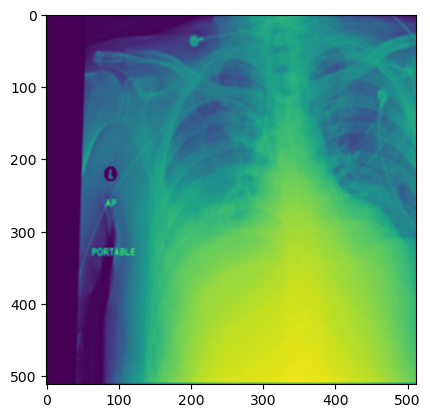

In [6]:
imshow(images[100])

In [7]:
masks.shape

(4992, 512, 512, 1)

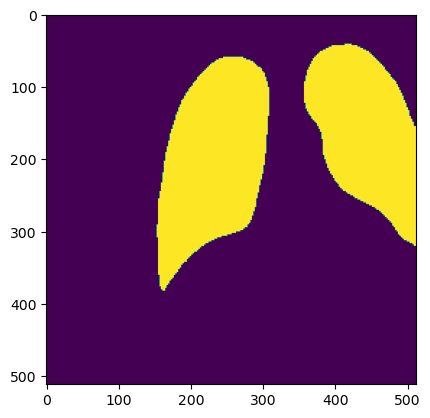

In [8]:
imshow(masks[100])

In [9]:
import sys
sys.path.append('../')
import gp2

In [10]:
from keras import losses

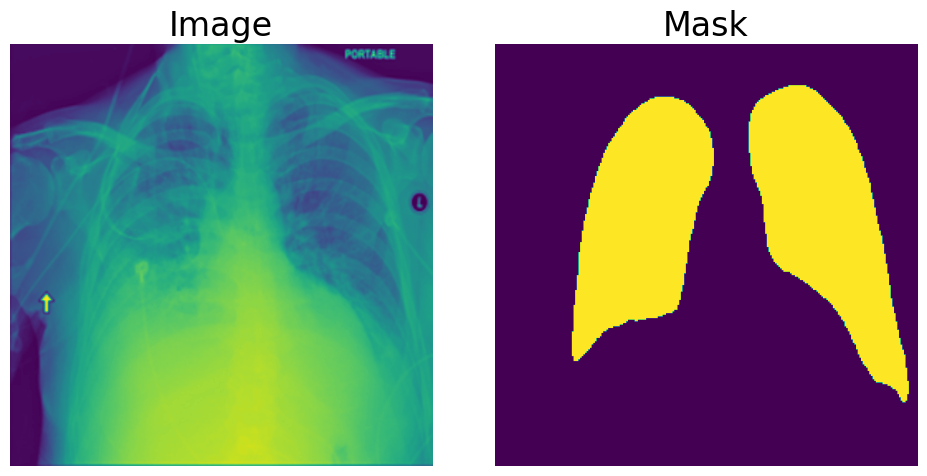

In [13]:
plt.rcParams['font.size'] = 20
gp2.Util.display_image_and_mask(images[111], masks[111])

In [11]:
loss_fx = losses.BCE

In [12]:
C = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpvge8e87ikuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmp7j62ffljkuc_unet2d


In [13]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmp7j62ffljkuc_unet2d
Verbose mode active!


In [14]:
R.classifier = C ### use custom classifier

In [15]:
R.run(images, masks, runs=5, batch_size=16, shuffle=True, results_file='/raid/mpsych/OMAMA/GP2/results/kuc_unet2d_0kuc_unet2d_model_1_5_LungOpacity.pkl')

Shuffling data...
Weights OK!
******
Loop 1
Epoch 1/100
16/16 [==============================] - 28s 1s/step - loss: 0.0434 - dice_coeff: 0.9463 - val_loss: 0.0308 - val_dice_coeff: 0.9605
Epoch 2/100
16/16 [==============================] - 8s 499ms/step - loss: 0.0279 - dice_coeff: 0.9632 - val_loss: 0.0241 - val_dice_coeff: 0.9671
Epoch 3/100
16/16 [==============================] - 8s 504ms/step - loss: 0.0216 - dice_coeff: 0.9698 - val_loss: 0.0234 - val_dice_coeff: 0.9703
Epoch 4/100
16/16 [==============================] - 8s 489ms/step - loss: 0.0192 - dice_coeff: 0.9732 - val_loss: 0.0227 - val_dice_coeff: 0.9716
Epoch 5/100
16/16 [==============================] - 8s 486ms/step - loss: 0.0176 - dice_coeff: 0.9757 - val_loss: 0.0235 - val_dice_coeff: 0.9719
Epoch 6/100
16/16 [==============================] - 8s 492ms/step - loss: 0.0160 - dice_coeff: 0.9776 - val_loss: 0.0246 - val_dice_coeff: 0.9734
Epoch 7/100
16/16 [==============================] - 8s 495ms/step - loss: 0

Testing the classifier...
Testing the discriminator...
10/10 [==============================] - 0s 38ms/step - loss: 1.1678e-06 - accuracy: 1.0000
Found 161 machine labels.
Replacing 53 from 161 !
D_relabeled_ 53
point ids 53
Removed: 53 Filled: 53
TOOK 183.8540756702423 seconds
==== DONE LOOP 3 ====
******
Loop 4
Epoch 1/100
25/25 [==============================] - 17s 701ms/step - loss: 0.0115 - dice_coeff: 0.9859 - val_loss: 0.0290 - val_dice_coeff: 0.9736
Epoch 2/100
25/25 [==============================] - 10s 411ms/step - loss: 0.0093 - dice_coeff: 0.9875 - val_loss: 0.0330 - val_dice_coeff: 0.9752
Epoch 3/100
25/25 [==============================] - 10s 414ms/step - loss: 0.0078 - dice_coeff: 0.9894 - val_loss: 0.0355 - val_dice_coeff: 0.9765
Epoch 4/100
25/25 [==============================] - 10s 414ms/step - loss: 0.0064 - dice_coeff: 0.9914 - val_loss: 0.0395 - val_dice_coeff: 0.9767
Epoch 5/100
25/25 [==============================] - 10s 412ms/step - loss: 0.0058 - dice_co

In [16]:
R.classifier_scores

[[0.03735308349132538, 0.9737136363983154],
 [0.0468343049287796, 0.9763048887252808],
 [0.04648672789335251, 0.9765968322753906],
 [0.050780076533555984, 0.9764516353607178],
 [0.07691903412342072, 0.9752623438835144]]

In [17]:
R.discriminator_scores

[[3.5623552321339957e-06, 1.0],
 [8.209023576455365e-07, 1.0],
 [1.1677624343064963e-06, 1.0],
 [1.3922220887252479e-06, 1.0],
 [1.5700259154982632e-06, 1.0]]

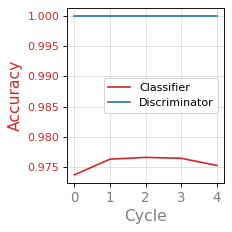

In [18]:
R.plot()

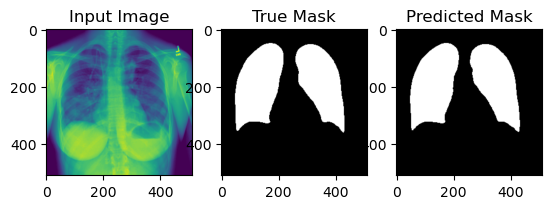

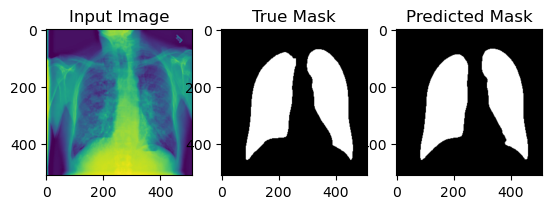

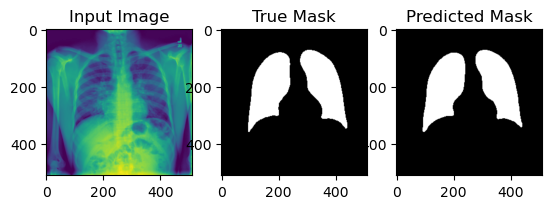

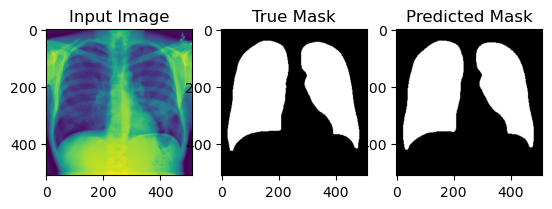

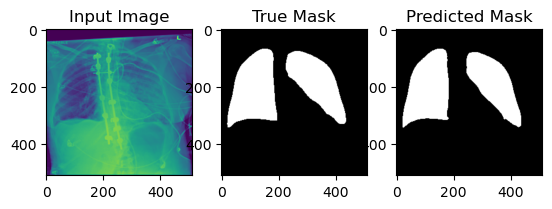

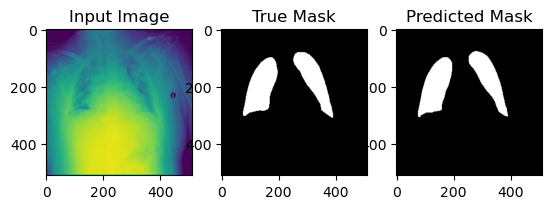

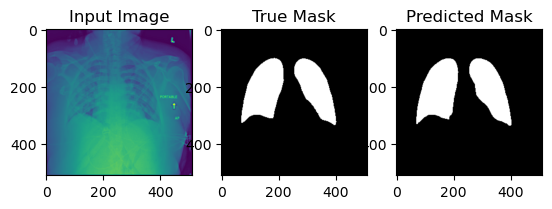

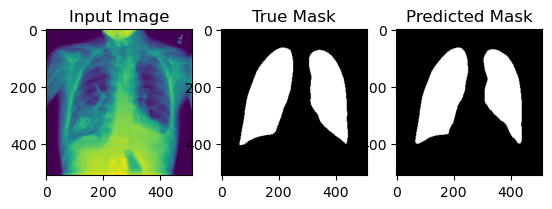

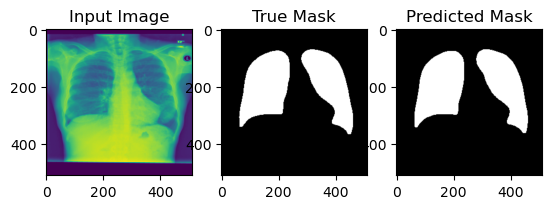

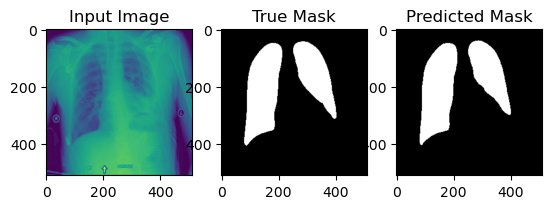

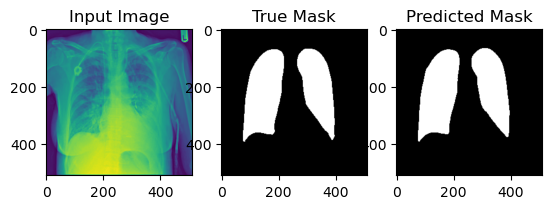

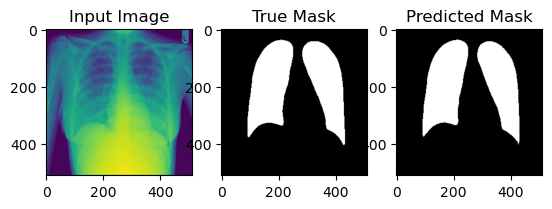

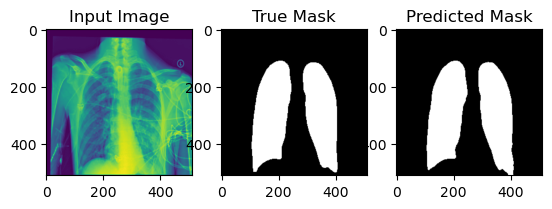

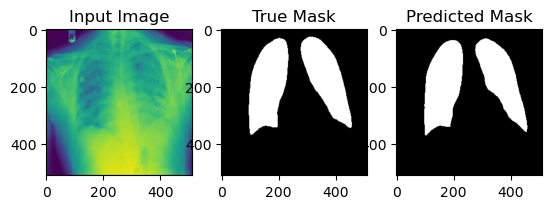

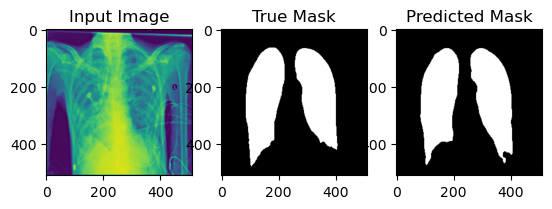

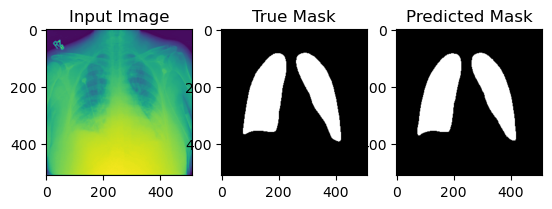

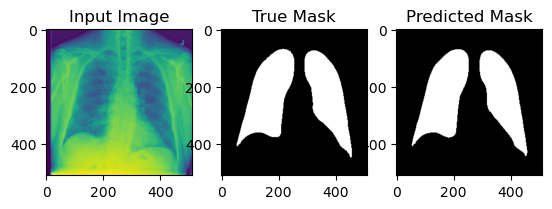

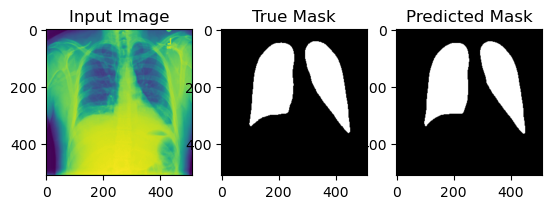

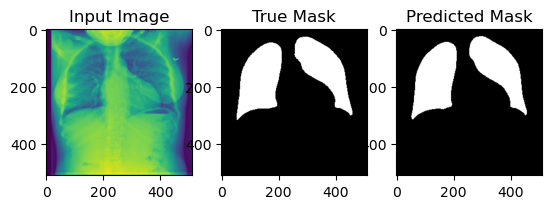

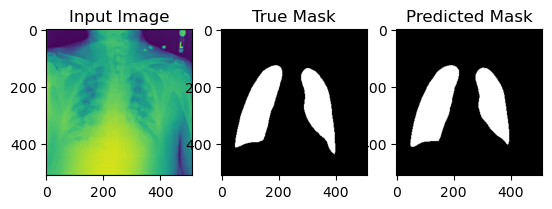

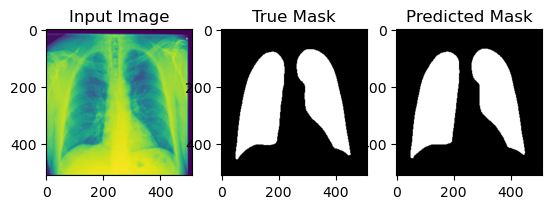

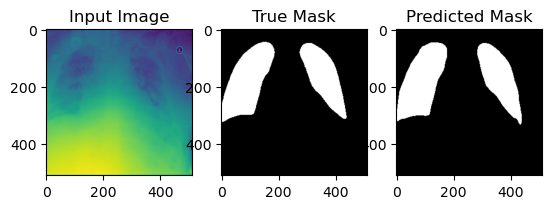

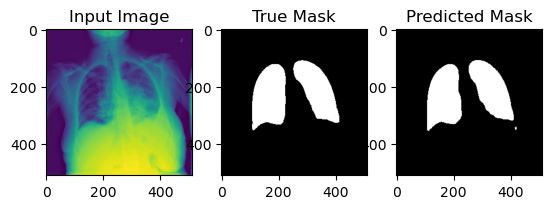

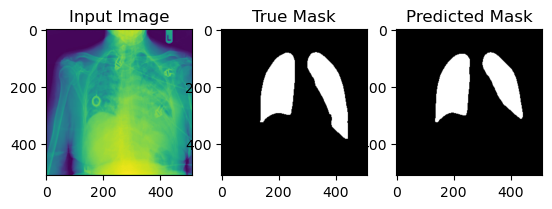

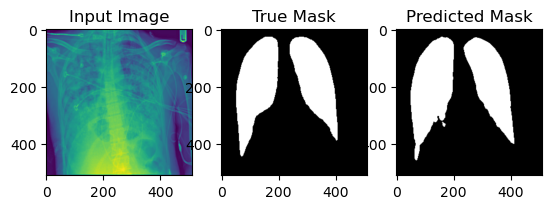

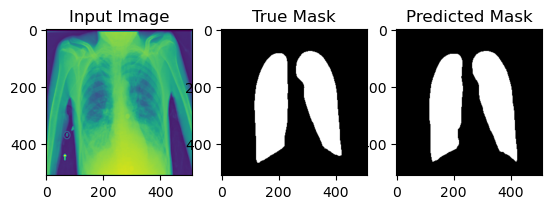

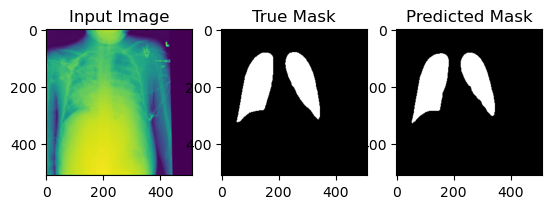

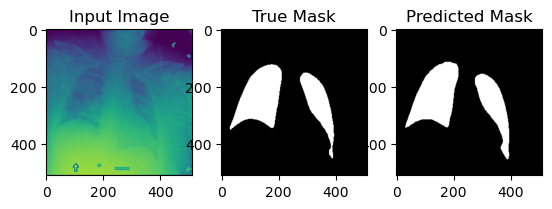

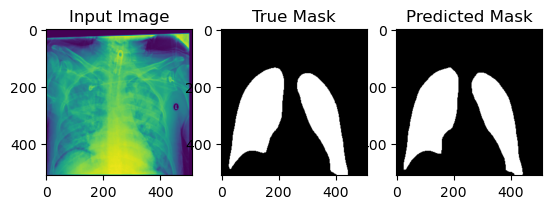

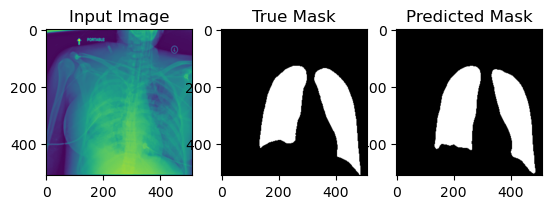

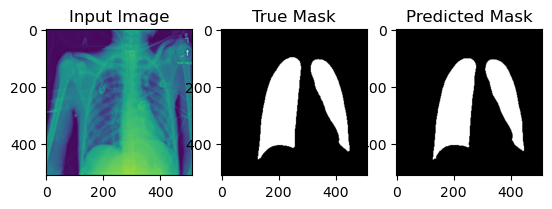

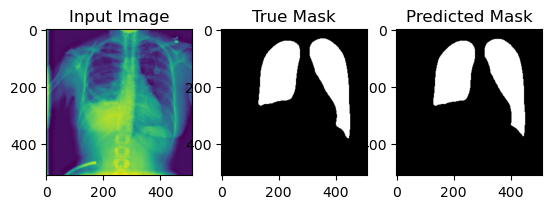

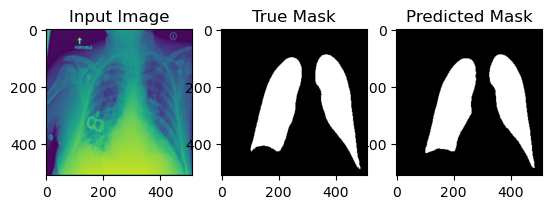

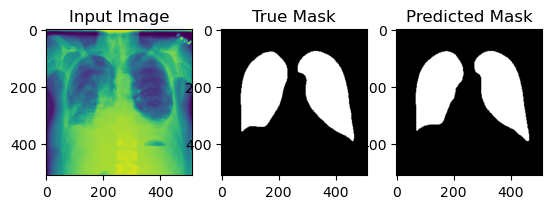

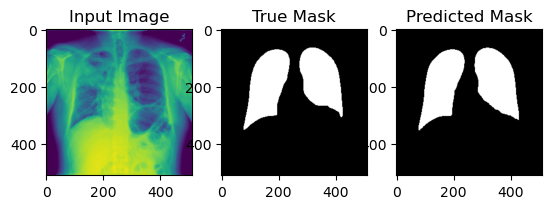

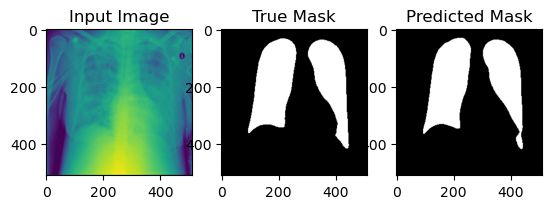

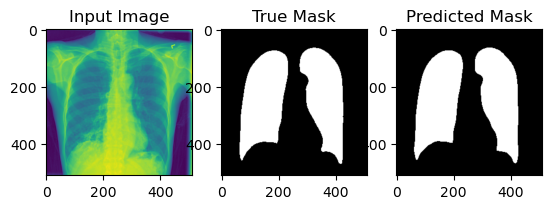

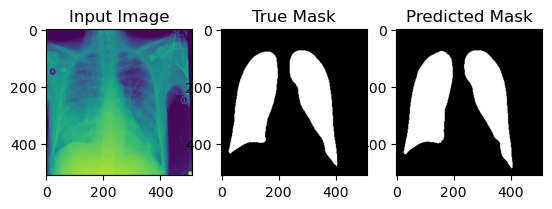

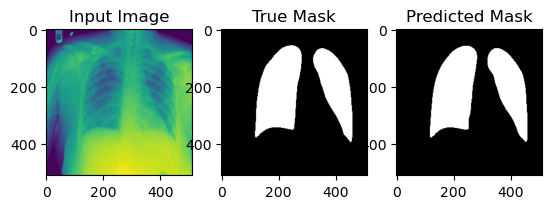

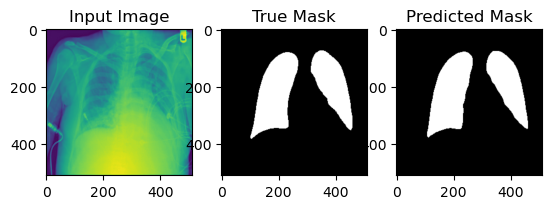

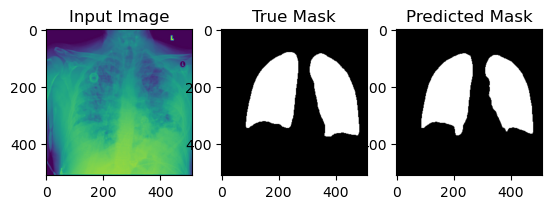

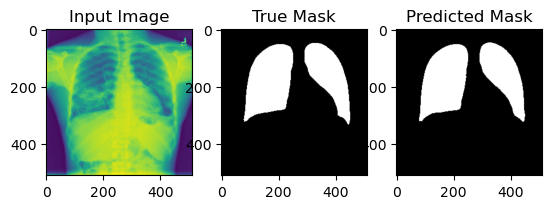

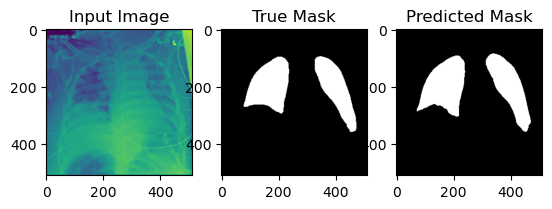

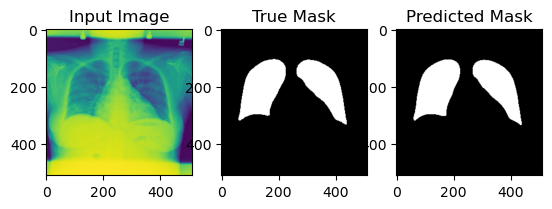

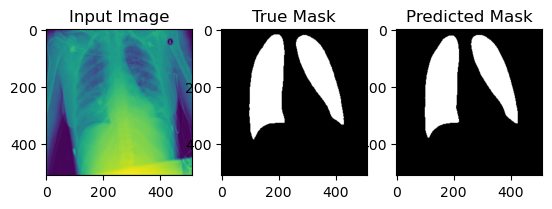

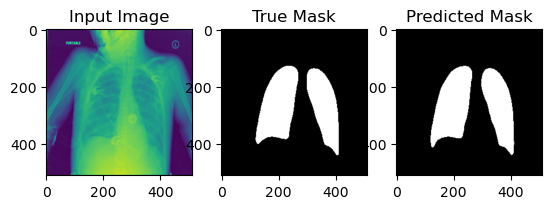

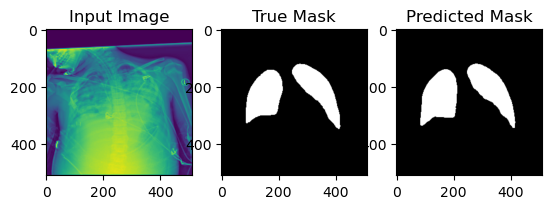

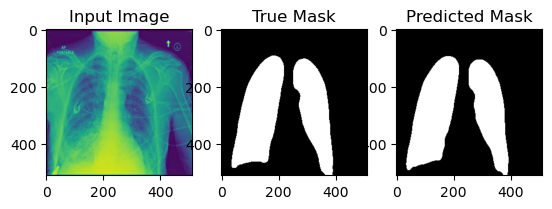

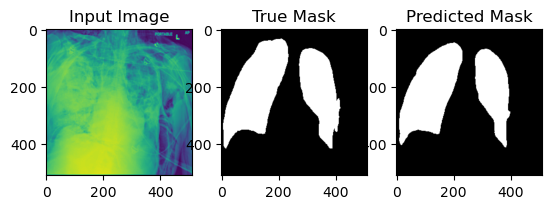

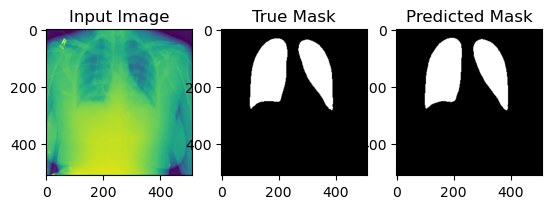

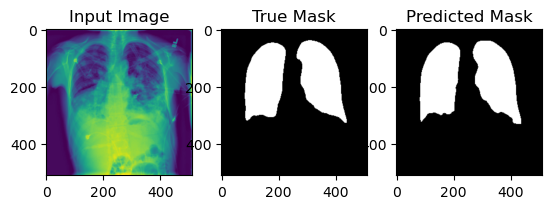

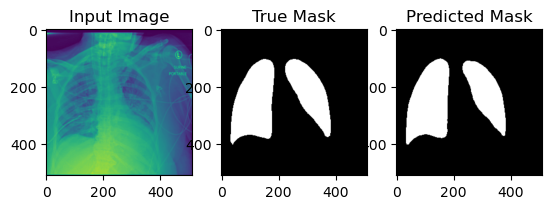

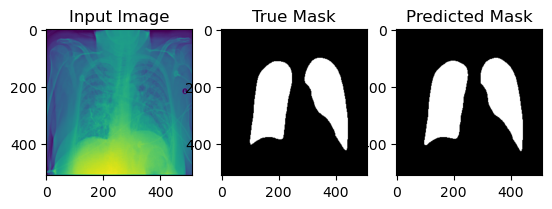

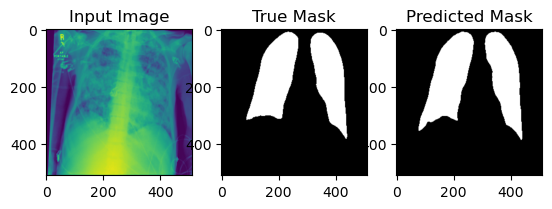

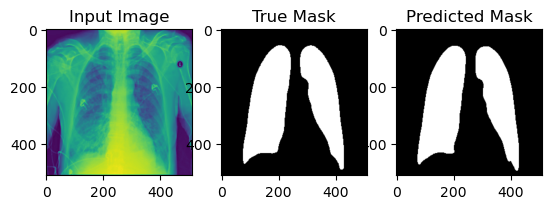

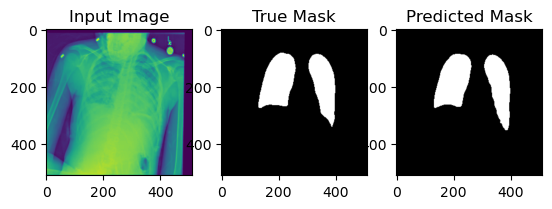

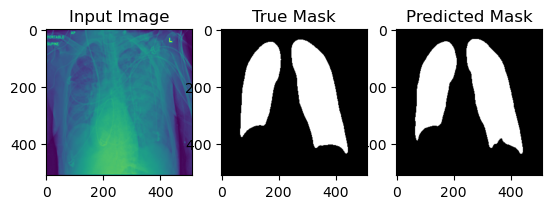

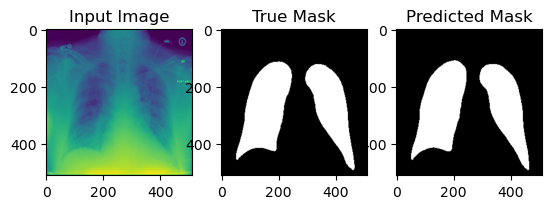

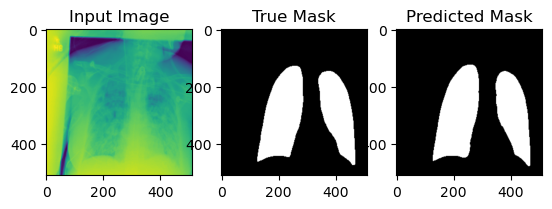

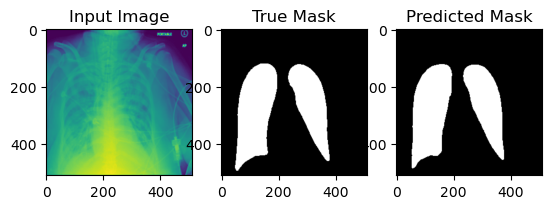

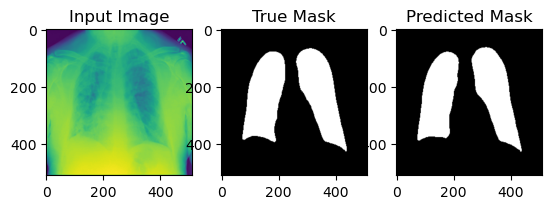

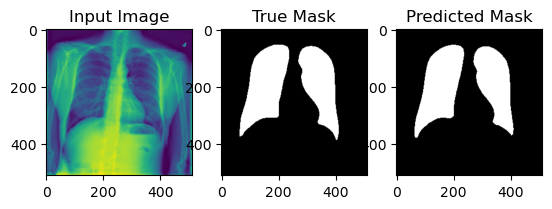

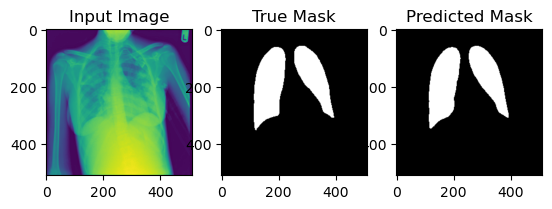

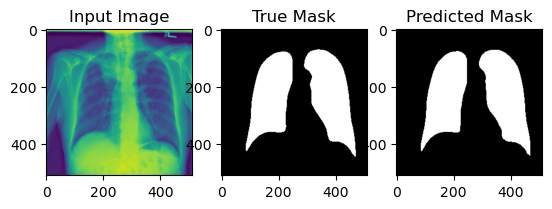

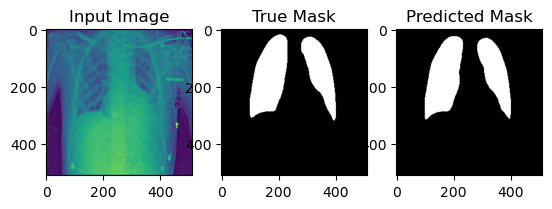

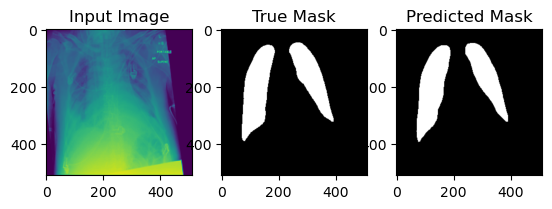

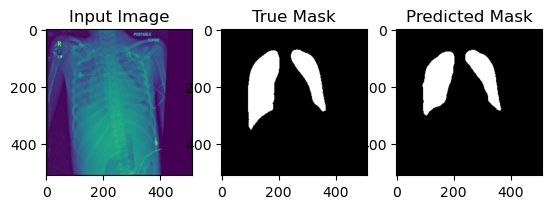

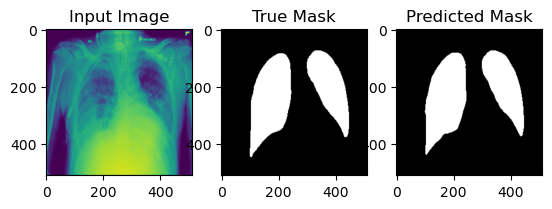

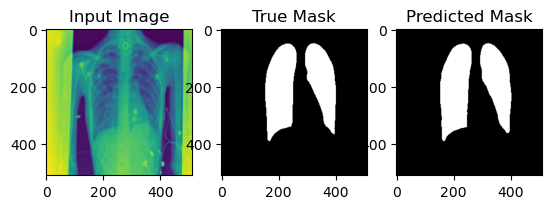

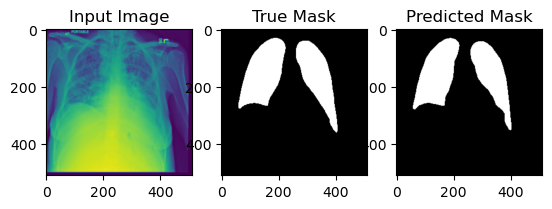

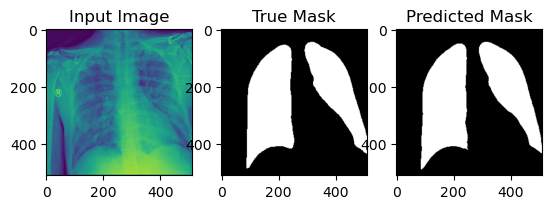

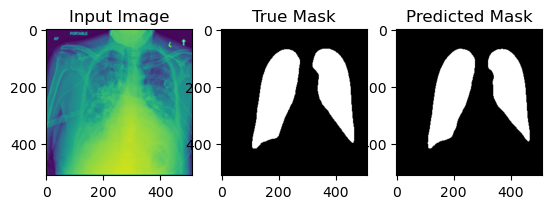

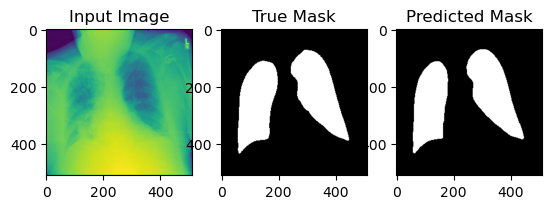

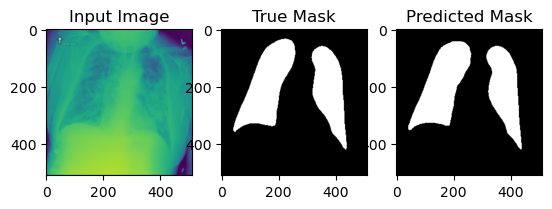

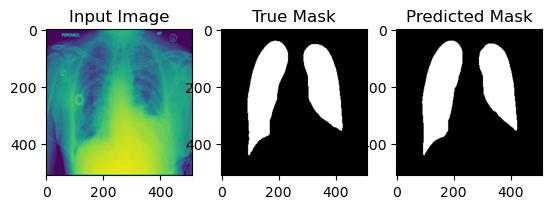

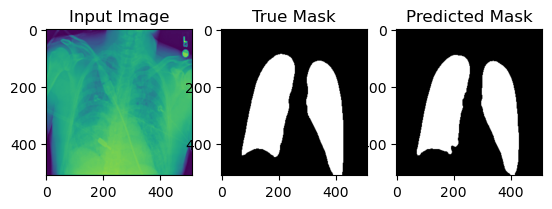

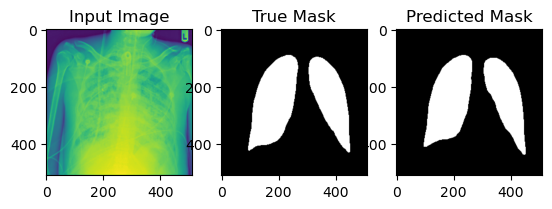

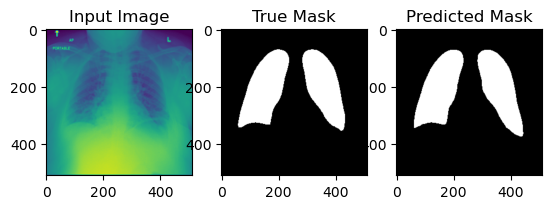

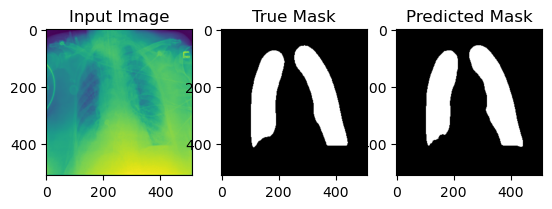

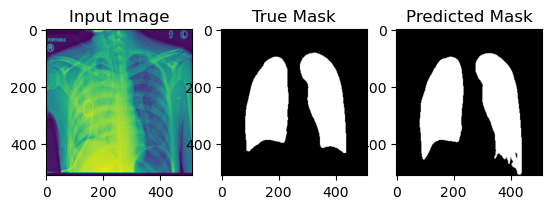

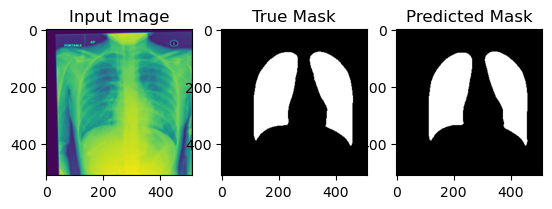

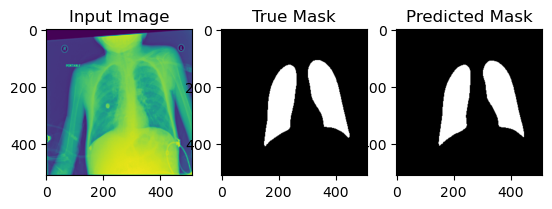

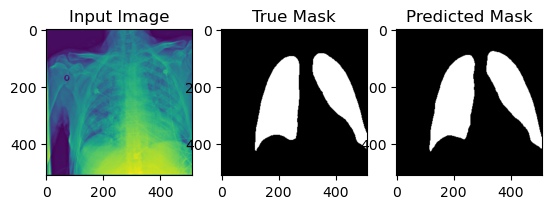

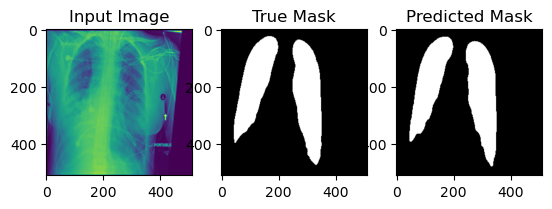

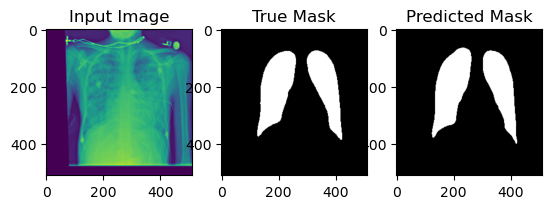

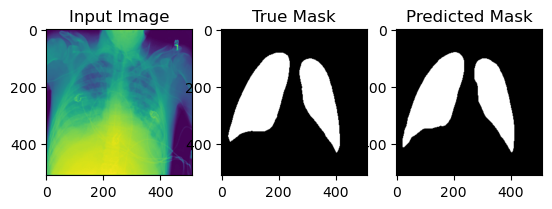

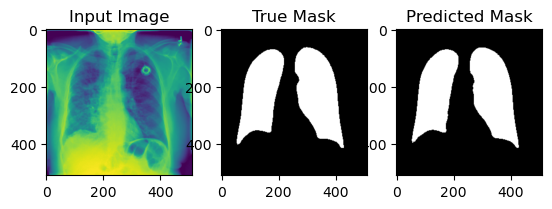

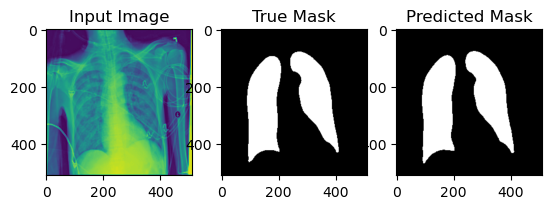

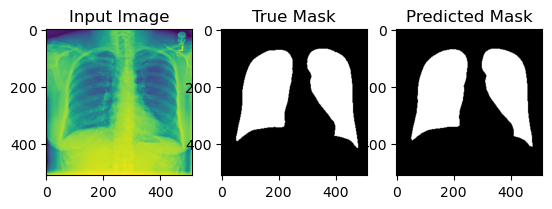

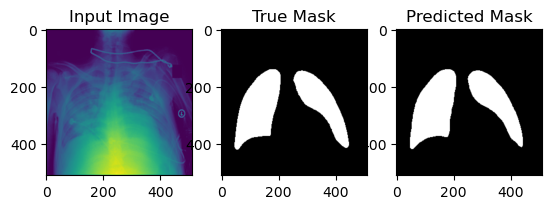

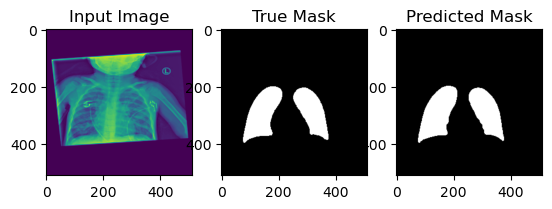

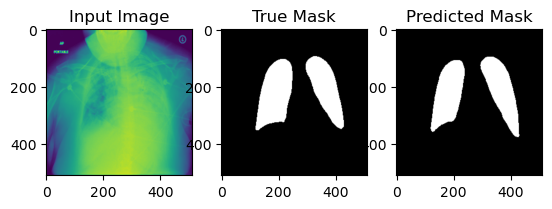

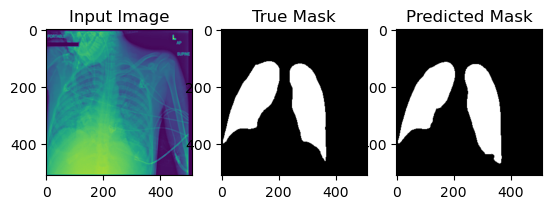

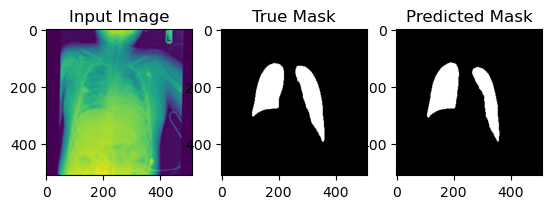

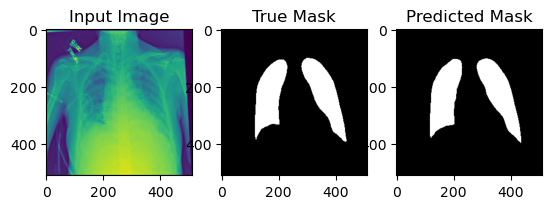

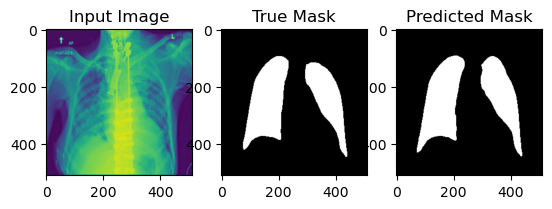

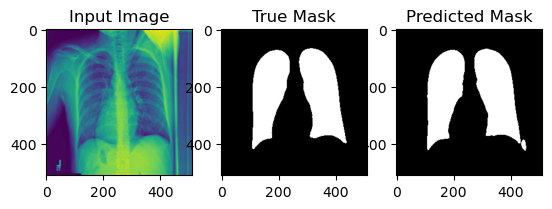

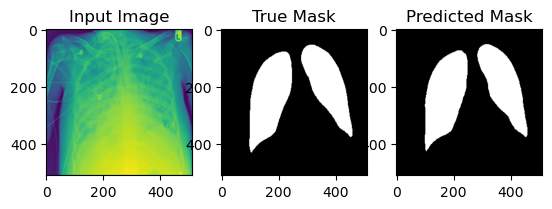

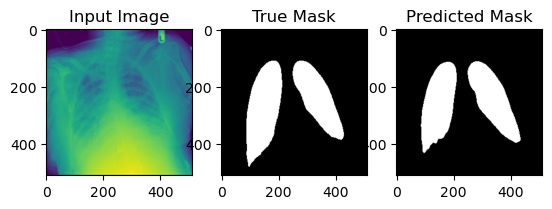

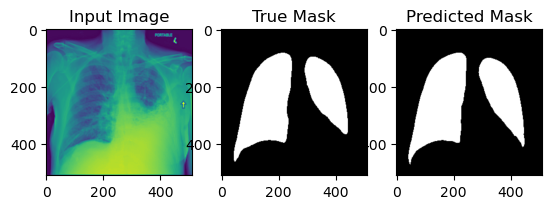

In [19]:
gp2.Util.visualize_predictions(C, X_test, y_test, num_samples=100)

In [20]:
y_pred = R.classifier.predict(X_test, y_test)

In [21]:
y_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [22]:
BareBone = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpvge8e87ikuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmp7j62ffljkuc_unet2d


In [23]:
barebone_pred = BareBone.predict(X_test, y_test)

In [24]:
barebone_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [25]:
BareBone.model.metrics_names

['loss', 'dice_coeff']